
Processing /content/drive/MyDrive/Colab çalışma/Neıman/müşteri/online_retail_II.xlsx
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
            Quantity                    InvoiceDate          Price  \
count  525461.000000                         525461  525461.000000   
mean       10.337667  2010-06-28 11:37:36.845017856       4.688834   
min     -9600.000000            2009-12-01 07:45:00  -53594.360000   
25%         1.000000            2010-03-21 12:20:00       1.250000   
50%         3.000000            2010-07-06 09:51:00       2.100000   
75%        10.000000            2010-10-15 12:45:00       4.210000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       107.424110                            NaN     146.126914   

         Customer ID  
count  417534.000000  
mean    15360.645478  
min     12346.000000  
25

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


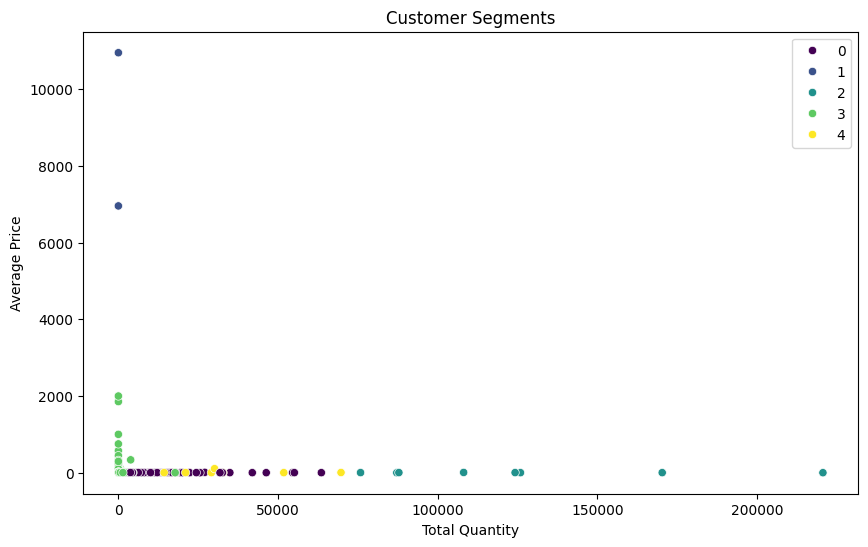

          Customer ID     Invoice       Quantity        Price
Segment                                                      
0        15275.556452   20.302419    6637.237903     3.192292
1        14339.000000    1.500000       1.500000  8955.835000
2        15050.500000   47.625000  124989.250000     2.852670
3        15354.599258    3.141409     643.343634     5.854177
4        15485.111111  120.777778   30144.555556    14.663408
Mean Squared Error: 48572379272.95834


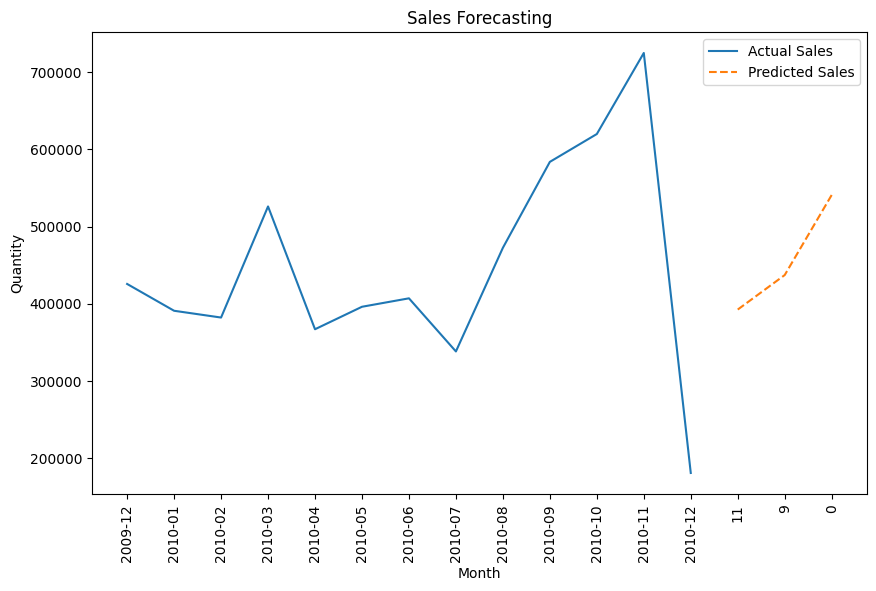


Processing /content/drive/MyDrive/Colab çalışma/Neıman/müşteri/Year 2009-2010.csv
Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64
            Quantity          Price    Customer ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


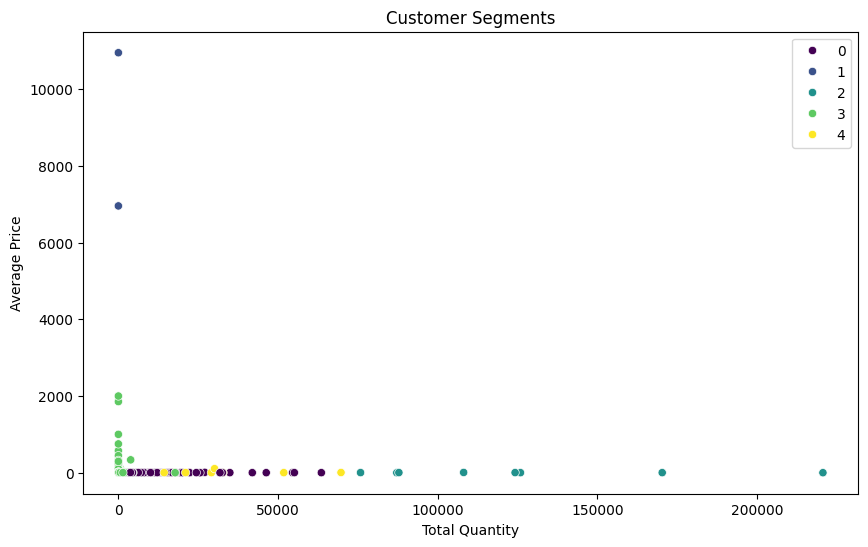

          Customer ID     Invoice       Quantity        Price
Segment                                                      
0        15275.556452   20.302419    6637.237903     3.192292
1        14339.000000    1.500000       1.500000  8955.835000
2        15050.500000   47.625000  124989.250000     2.852670
3        15354.599258    3.141409     643.343634     5.854177
4        15485.111111  120.777778   30144.555556    14.663408
Mean Squared Error: 48572379272.95834


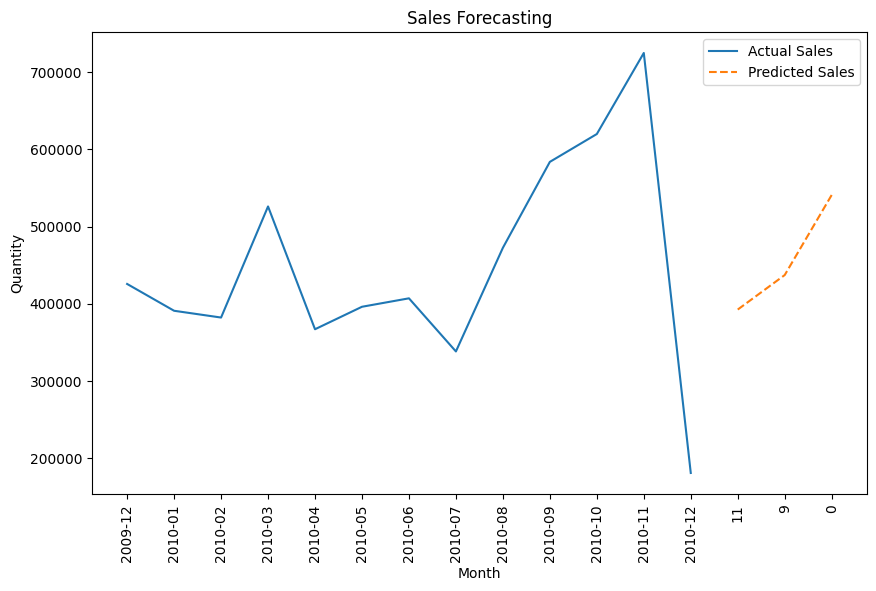


Processing /content/drive/MyDrive/Colab çalışma/Neıman/müşteri/Year 2010-2011.csv
Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64
            Quantity          Price    Customer ID
count  541910.000000  541910.000000  406830.000000
mean        9.552234       4.611138   15287.684160
std       218.080957      96.759765    1713.603074
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


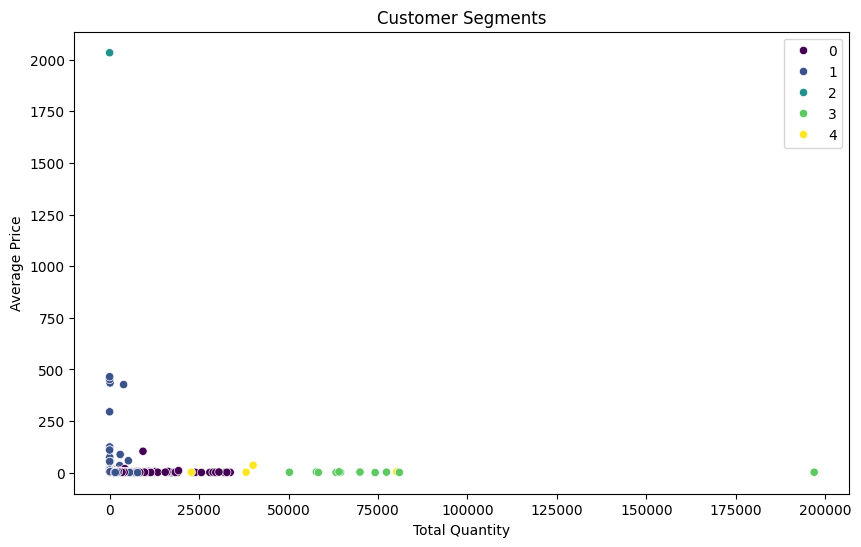

          Customer ID     Invoice      Quantity        Price
Segment                                                     
0        15281.847176   18.259136   5227.750831     3.557391
1        15302.522778    2.902664    614.266119     4.034544
2        17846.000000    1.000000      1.000000  2033.100000
3        15249.818182   37.363636  77984.090909     2.515641
4        14688.250000  120.500000  31639.625000     7.047400
Mean Squared Error: 36881789377.10473


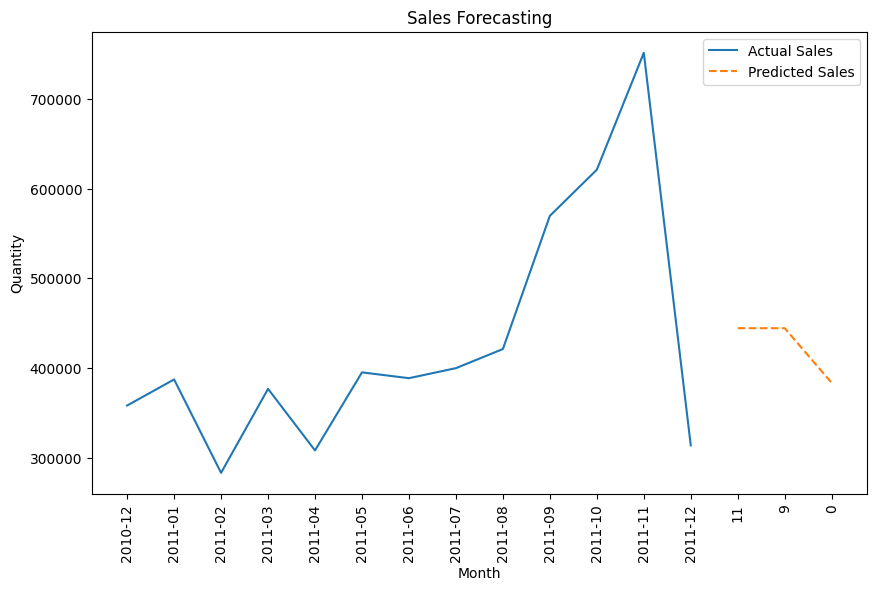

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os

def load_and_preprocess(filepath):
    # Dosya uzantısına göre yükleme işlevi seçme
    file_extension = os.path.splitext(filepath)[1]
    if file_extension == '.csv':
        df = pd.read_csv(filepath, encoding='latin1')
    elif file_extension == '.xlsx':
        df = pd.read_excel(filepath, engine='openpyxl')
    else:
        raise ValueError("Unsupported file format")

    # Veri setinde eksik değerlerin olup olmadığını kontrol etme
    print(df.isnull().sum())

    # Temel istatistikler
    print(df.describe())

    # 'Customer ID' sütununda eksik değerleri doldurma veya kaldırma
    df['Customer ID'] = df['Customer ID'].fillna(0)

    # 'Description' sütununda eksik değerleri doldurma
    df['Description'] = df['Description'].fillna('Unknown')

    # Negatif veya sıfır değerlerdeki anormal miktarları kaldırma
    df = df[df['Quantity'] > 0]
    df = df[df['Price'] > 0]

    # Tekrarlanan satırları kaldırma
    df.drop_duplicates(inplace=True)

    # InvoiceDate sütununu datetime tipine çevirme
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

    return df

def customer_segmentation(df):
    # 'Customer ID' 0 olan satırları filtreleme
    df_customers = df[df['Customer ID'] != 0]

    # Müşteri bazında özet veriyi hesaplama
    customer_data = df_customers.groupby('Customer ID').agg({
        'Invoice': 'nunique',
        'Quantity': 'sum',
        'Price': 'mean'
    }).reset_index()

    # Özellikleri standardize etme
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(customer_data[['Invoice', 'Quantity', 'Price']])

    # K-Means modeli
    kmeans = KMeans(n_clusters=5, random_state=42)
    customer_data['Segment'] = kmeans.fit_predict(scaled_features)

    # Segmentlerin görselleştirilmesi
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Quantity', y='Price', hue='Segment', data=customer_data, palette='viridis')
    plt.title('Customer Segments')
    plt.xlabel('Total Quantity')
    plt.ylabel('Average Price')
    plt.legend()
    plt.show()

    # Her segmentin özellikleri
    print(customer_data.groupby('Segment').mean())

def sales_forecasting(df):
    # Veriyi aylık bazda özetleme
    df['Month'] = df['InvoiceDate'].dt.to_period('M')
    monthly_sales = df.groupby('Month').agg({
        'Quantity': 'sum',
        'Price': 'mean'
    }).reset_index()

    # Özellikleri ve hedef değişkeni belirleme
    X = monthly_sales[['Price']]
    y = monthly_sales['Quantity']

    # Veriyi eğitim ve test setlerine ayırma
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest modeli
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Modelin performansını değerlendirme
    y_pred = model.predict(X_test)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

    # Sonuçların görselleştirilmesi
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Quantity'], label='Actual Sales')
    plt.plot(X_test.index.astype(str), y_pred, label='Predicted Sales', linestyle='--')
    plt.xticks(rotation=90)
    plt.title('Sales Forecasting')
    plt.xlabel('Month')
    plt.ylabel('Quantity')
    plt.legend()
    plt.show()

# Veri setlerini yükleme ve ön işleme
datasets = [
    "/content/drive/MyDrive/Colab çalışma/Neıman/müşteri/online_retail_II.xlsx",
    "/content/drive/MyDrive/Colab çalışma/Neıman/müşteri/Year 2009-2010.csv",
    "/content/drive/MyDrive/Colab çalışma/Neıman/müşteri/Year 2010-2011.csv"
]

for filepath in datasets:
    print(f"\nProcessing {filepath}")
    df = load_and_preprocess(filepath)
    customer_segmentation(df)
    sales_forecasting(df)
